In [1]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline 


loading the data

In [2]:
model = LinearRegression()

df = pd.read_csv (r'C:\Users\nikun\Desktop\archive\sales_data_sample.csv', encoding='ISO-8859-1') 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


data cleaning

In [3]:
df=df.drop_duplicates()
ddf=df.dropna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


remove time in orderdate

In [5]:

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


sales by year

Text(0.5, 1.0, 'sales by year')

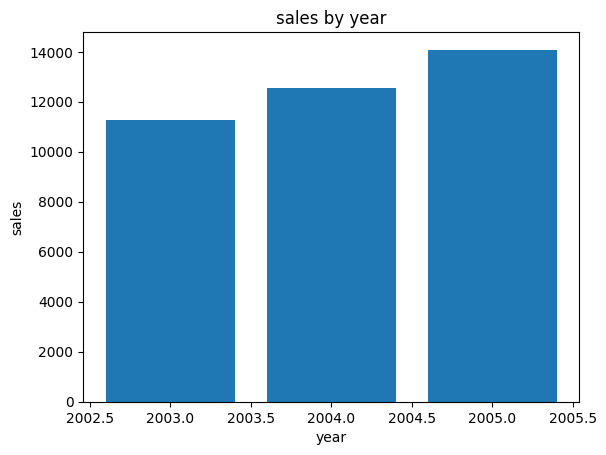

In [6]:
plt.bar(df['YEAR_ID'],df['SALES'])
plt.xlabel('year')
plt.ylabel('sales')
plt.title('sales by year')

year future predictions

mse= 952135118105.2831


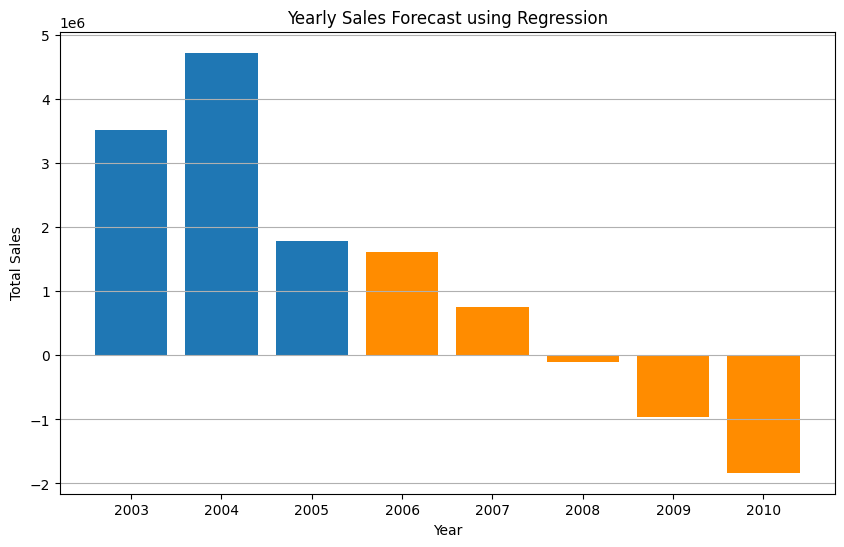

In [7]:
# Group sales by year
df['Year'] = df['ORDERDATE'].dt.year
yearly_sales = df.groupby('Year')['SALES'].sum().reset_index()

# Add time index for regression
yearly_sales['YearIndex'] = np.arange(len(yearly_sales))

# Prepare features and target
X = yearly_sales[['YearIndex']]
y = yearly_sales['SALES']


# Fit regression model
model.fit(X, y)
ypred=model.predict(X)

# Predict future years (e.g., next 5 years)
future_years = pd.DataFrame({
    'YearIndex': np.arange(len(yearly_sales), len(yearly_sales) + 5)
})
future_sales = model.predict(future_years)

# Combine year labels
future_year_labels = np.arange(yearly_sales['Year'].max() + 1, yearly_sales['Year'].max() + 6)

# Plot actual + forecasted sales
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['Year'], yearly_sales['SALES'])
plt.bar(future_year_labels, future_sales, label='Forecast (Regression)', color='darkorange',)

plt.title('Yearly Sales Forecast using Regression')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(axis='y')
print("mse=",mean_squared_error(y,ypred))

monthly sales

Text(0.5, 1.0, 'plot by months')

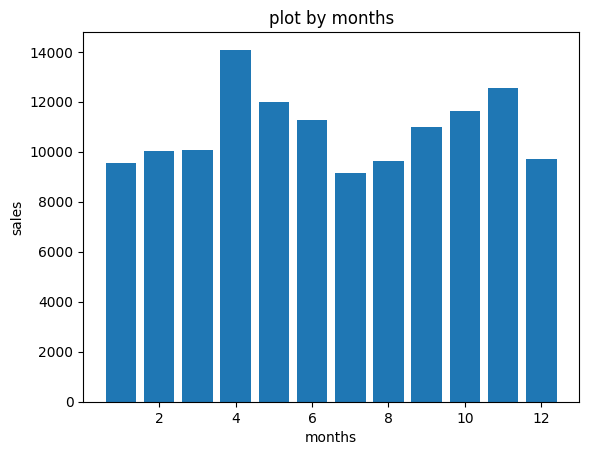

In [8]:
plt.bar(df['MONTH_ID'],df['SALES'])
plt.xlabel('months')
plt.ylabel('sales')
plt.title('plot by months')

monthly predictions


mse= 43187160544.13004


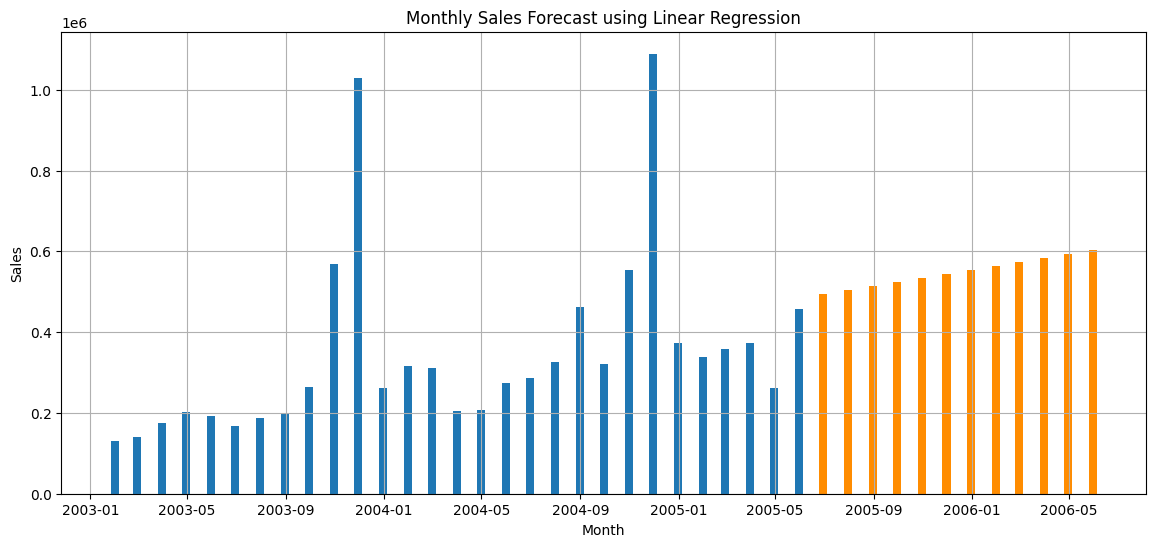

In [9]:
# Group by Year-Month
monthly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='ME'))['SALES'].sum().reset_index()

# Add time index for regression
monthly_sales['MonthIndex'] = np.arange(len(monthly_sales))

# Features and target
X = monthly_sales[['MonthIndex']]
y = monthly_sales['SALES']

# Fit regression model
model = LinearRegression()
model.fit(X, y)
ypred=model.predict(X)
# Predict next 12 months
future_months = pd.DataFrame({
    'MonthIndex': np.arange(len(monthly_sales), len(monthly_sales) + 12)
})
future_sales = model.predict(future_months)

# Create full timeline for plotting
full_months = pd.date_range(start=monthly_sales['ORDERDATE'].min(), periods=len(monthly_sales) + 12, freq='ME')

# Plot
plt.figure(figsize=(14, 6))
plt.bar(monthly_sales['ORDERDATE'], monthly_sales['SALES'],width=10)
plt.bar(full_months[-12:], future_sales, label='Forecast (Regression)', color='darkorange',width=10)

plt.title('Monthly Sales Forecast using Linear Regression')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
print("mse=",mean_squared_error(y,ypred))


weekly sales

Text(0, 0.5, 'Total Sales')

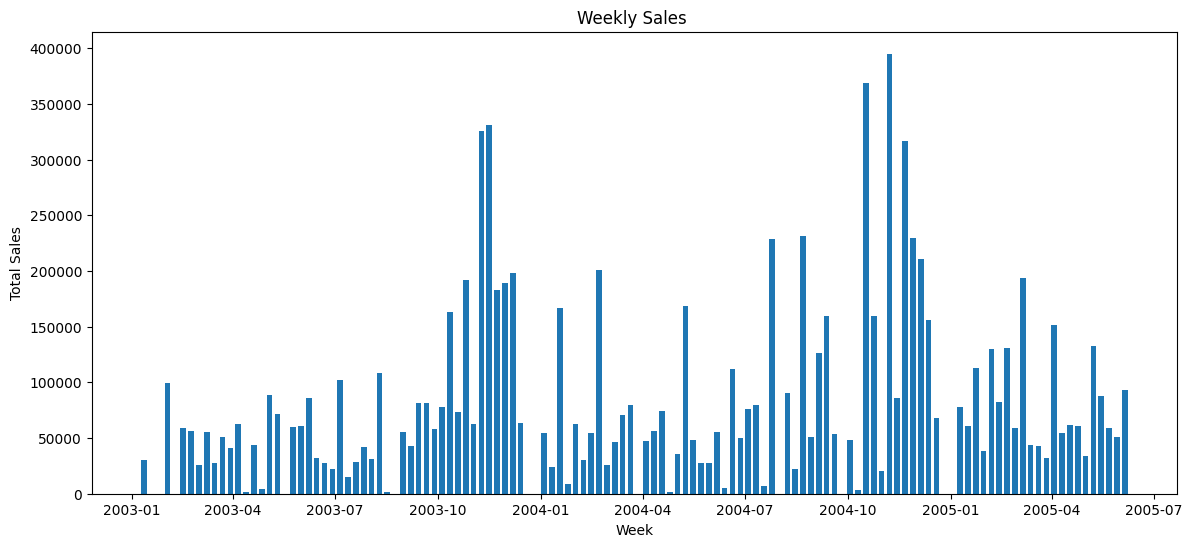

In [10]:

# Group by week
weekly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='W'))['SALES'].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.bar(weekly_sales['ORDERDATE'], weekly_sales['SALES'],width=5)
plt.title('Weekly Sales ')
plt.xlabel('Week')
plt.ylabel('Total Sales')



mse= 5956940210.958492


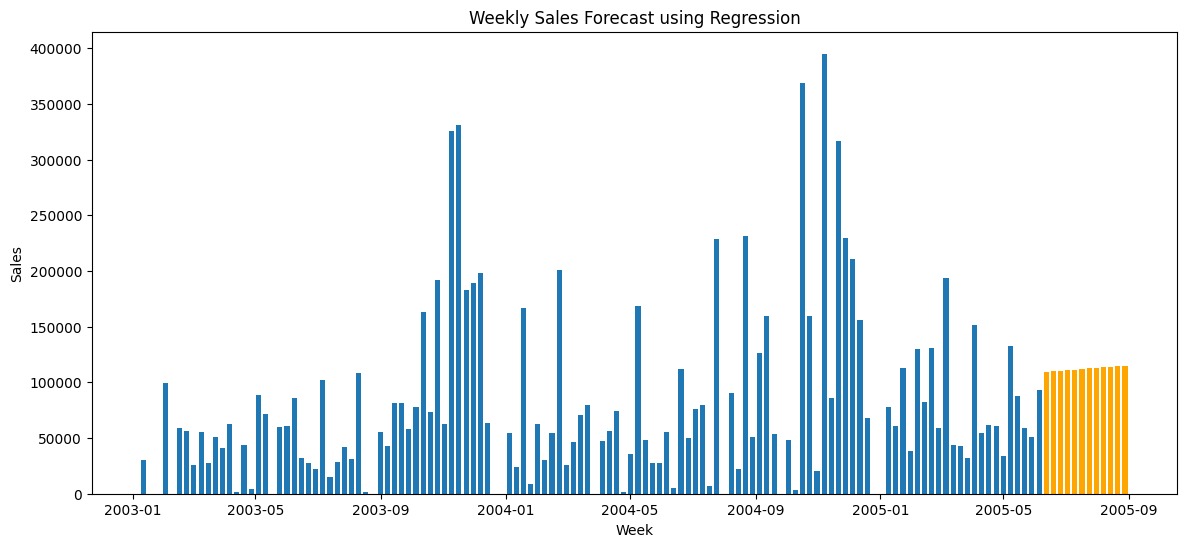

In [11]:
weekly_sales['WeekIndex'] = np.arange(len(weekly_sales))

# Prepare features and target
X = weekly_sales[['WeekIndex']]
y = weekly_sales['SALES']

# Fit Linear Regression model

model.fit(X, y)
ypred=model.predict(X)
# Predict next 12 weeks
future_weeks = pd.DataFrame({'WeekIndex': np.arange(len(weekly_sales), len(weekly_sales) + 12)})
future_sales = model.predict(future_weeks)

# Combine for plotting
full_weeks = pd.date_range(start=weekly_sales['ORDERDATE'].min(),
                           periods=len(weekly_sales) + 12, freq='W')


plt.figure(figsize=(14, 6))
plt.bar(weekly_sales['ORDERDATE'], weekly_sales['SALES'], width=5, label='Actual Sales' )
plt.bar(full_weeks[-12:], future_sales, label='Forecast (Regression)', color='orange',width=5)

plt.title('Weekly Sales Forecast using Regression')
plt.xlabel('Week')
plt.ylabel('Sales')
print("mse=",mean_squared_error(y,ypred))